In [3]:
import torch
import  json
import pickle
from torch.utils import data
import os
import numpy as np
import glob
from PIL import Image
import matplotlib.pyplot as plt
from PIL import ImageDraw
class DataSet(data.Dataset):
    def __init__(self, data_root):
        self.root =data_root
        # self.split = split



        self.img_path = os.path.join(self.root+'img06') #join -> args들이 string으로 들어오면 해당 string을 path 형식으로 바꿔줌
        self.json_path = os.path.join(self.root+ 'object_detection') #join -> args들이 string으로 들어오면 해당 string을 path 형식으로 바꿔줌

                                                                #join('kitti', 'train') -> kitti/train
        # print('path', self.path)
        self.img_files = sorted(glob.glob(self.img_path + "/*.png"), key=os.path.getctime) #glob.glob -> 해당 path에 있는 파일의 정보를 모아둠 !!이미지를 가져오는건 아님!!
        print(len(self.img_files))
        self.json_files = sorted(glob.glob(self.json_path  + "/*.txt"), key=os.path.getctime) #glob.glob -> 해당 path에 있는 파일의 정보를 모아둠 !!이미지를 가져오는건 아님!!
        print(len(self.json_files))
        
        assert len(self.img_files) is not 0, f'There are no images in path {self.img_path}'
        assert len(self.json_files) is not 0, f'There are no images in path {self.pjson_pathath}'
        assert len(self.img_files) == len(self.json_files)

        
    def __len__(self):
        return len(self.img_files)
    
    def __getitem__(self, index): #!반드시 getitem의 args에는 index가 있음 Dataloader에서 알아서 넘기고 getitem 함수를 실행시켜, image, target을 가져옴
        #TODO: Load Image from file list (self.files), Data Augmentation, Label Load
        img = self.pull_item_img(index)
        box = self.pull_item_box(index)

            
        return img, box
    
    def pull_item_img(self, index):
        img_path = self.img_files[index]
        # print('img_path', img_path)
        img = Image.open(img_path)
        # img = np.asarray(img)
        
        return img
    def pull_item_box(self, index):
       
        json_path = self.json_files[index]
        dict1 = json.load(open(json_path))
        boxes =[]
        for d in dict1:
            boxes.append(d['bbox'])

        for b in boxes:
            print(b)


        return boxes  # tensor (N, 3, 300, 300), 3 lists of N tensors each

    def pil_draw_rect(self,image, boxes):
        print('box: ', boxes)
        for b in boxes:
            draw = ImageDraw.Draw(image)
            print('dd',b[0],b[1])

            point1 = tuple(b[0])
            point2 = tuple(b[1])
            draw.rectangle((point1, point2), outline=(0, 0, 255), width=3)
        return image
        

<>:28: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:29: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:28: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:29: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_238880/1865369687.py:28: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  assert len(self.img_files) is not 0, f'There are no images in path {self.img_path}'
/tmp/ipykernel_238880/1865369687.py:29: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  assert len(self.json_files) is not 0, f'There are no images in path {self.pjson_pathath}'


966
966
[[471.17114434893557, 458.6093123959783], [492.88430799699455, 505.39063882208967]]
[[52.270575809757425, 805.9673238590211], [104.69536462643288, 836.2407425903652]]
[[476.94534225044794, 617.5761445112812], [485.86304142382954, 648.020697414177]]
box:  [[[471.17114434893557, 458.6093123959783], [492.88430799699455, 505.39063882208967]], [[52.270575809757425, 805.9673238590211], [104.69536462643288, 836.2407425903652]], [[476.94534225044794, 617.5761445112812], [485.86304142382954, 648.020697414177]]]
dd [471.17114434893557, 458.6093123959783] [492.88430799699455, 505.39063882208967]
dd [52.270575809757425, 805.9673238590211] [104.69536462643288, 836.2407425903652]
dd [476.94534225044794, 617.5761445112812] [485.86304142382954, 648.020697414177]


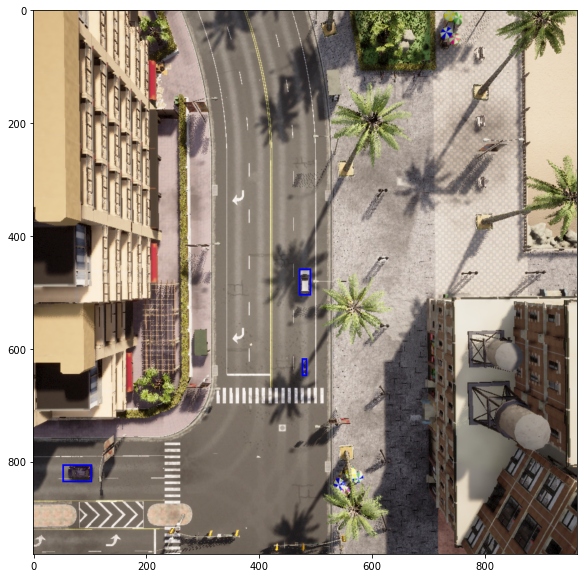

In [4]:
dataset = DataSet(data_root = '/home/rml/ws/TestData/drive_001/')

# box = dataset.pull_item_box(0)

img, box = dataset.__getitem__(0)
# print('0',box[0][0])
# image = dataset.pil_draw_rect(img, tuple(box[0][0]), tuple(box[0][1]))
image = dataset.pil_draw_rect(img, box)

plt.figure(figsize=(20,10))
plt.imshow(image)
plt.show()
# print(box)
